In [1]:
from CollectMaPSAs import *
import cPickle
import matplotlib.pyplot as plt

In [2]:
mapsa_names = ["HPK_35494_040L"]

In [3]:
plt.rc('font', size=22, weight='bold')
plt.rc('axes', titlesize=22)#, labelsize=18)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=22)
plt.rc('figure', titlesize=22)

In [4]:
mapsas = []
for m in mapsa_names:
    # Read MaPSA object from file, if available
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        print("Loading MaPSA " + m)
        mapsa = cPickle.load(open(fname,'rb'))
    else: # Create it
        print("MaPSA " + m +" has no pickle")

    mapsas += [mapsa]

Loading MaPSA HPK_35494_040L


In [5]:
def scurve_plots(mapsas, whichcurve):

    print("Processing " + str(len(mapsas)) + " MaPSAs for S-curve plots")

    # CAL pre-trim
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
                
            if whichcurve == "CAL_pretrim":
                df = chip.CALS_pretrim.transpose()[0:256]
            elif whichcurve == "CAL_posttrim":
                df = chip.CALS.transpose()[0:256]
            elif whichcurve == "THR_pretrim":
                df = chip.THRS_pretrim.transpose()[0:256]
            elif whichcurve == "THR_posttrim":
                df = chip.THRS.transpose()[0:256]
            elif whichcurve == "Bump":
                df = chip.BumpS.transpose()[0:256]
            
            df.plot(legend=False,figsize=(8,6))
            plt.xlabel('Units',fontweight='bold')
            plt.ylabel(whichcurve,fontweight='bold')
            plt.title(m.name+" MPA " + str(chip.index))
            plt.tight_layout()
            #plt.savefig("scurves/"+m.name+"_"+str(chip.index)+"_"+whichcurve+"_Scurves.png",bbox_inches='tight')
            #plt.savefig("scurves/"+m.name+"_"+str(chip.index)+"_"+whichcurve+"_Scurves.png",bbox_inches='tight')

            plt.show()

Processing 1 MaPSAs for S-curve plots


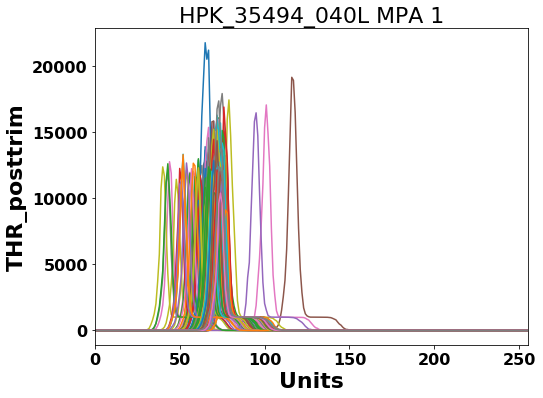

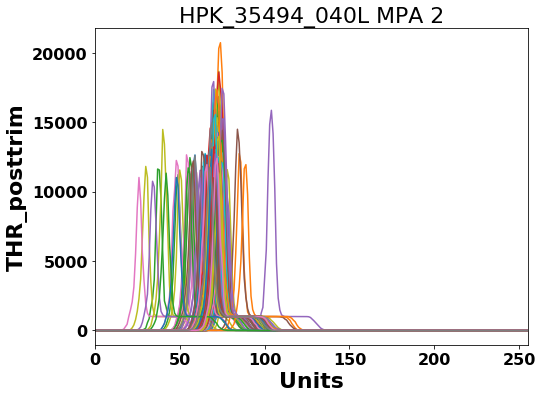

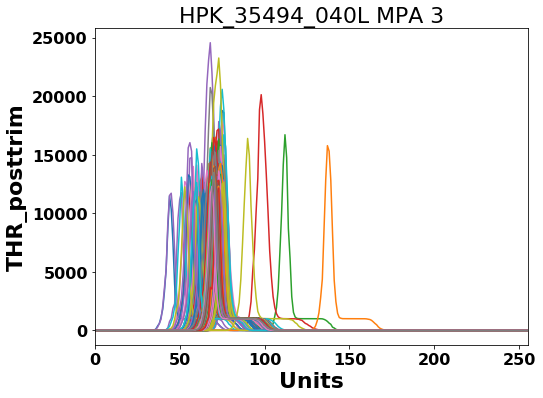

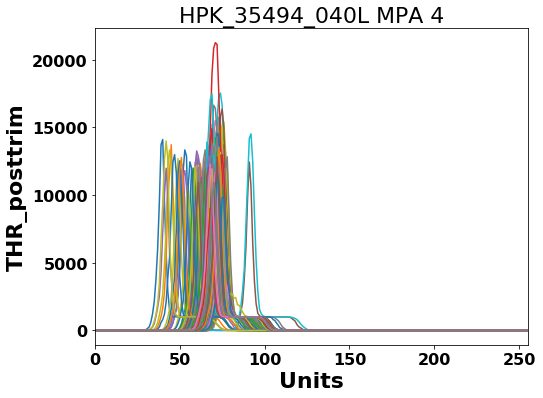

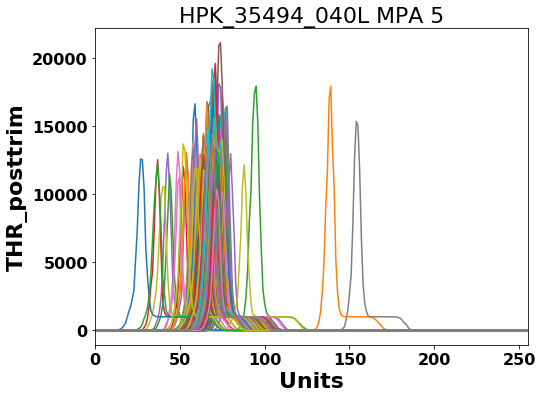

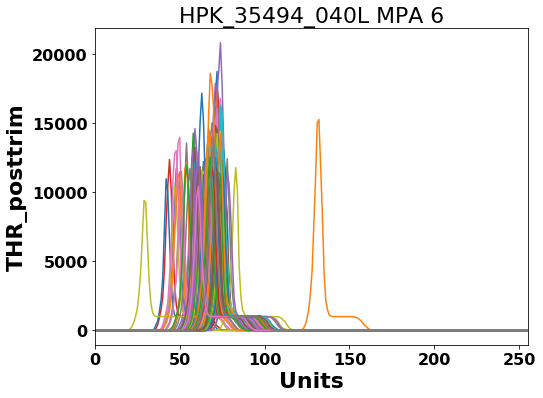

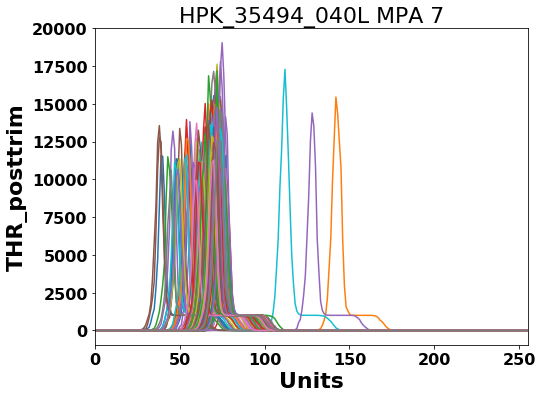

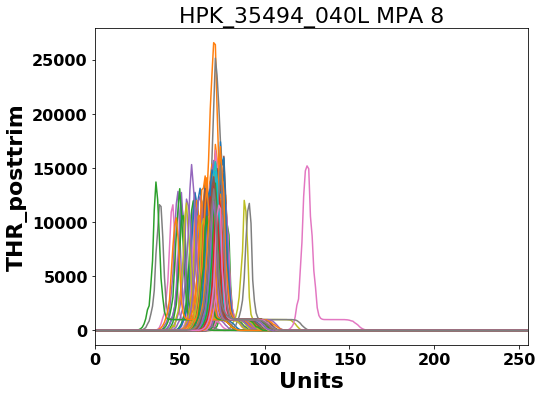

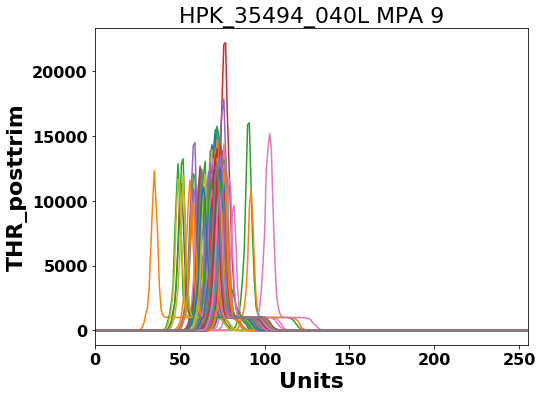

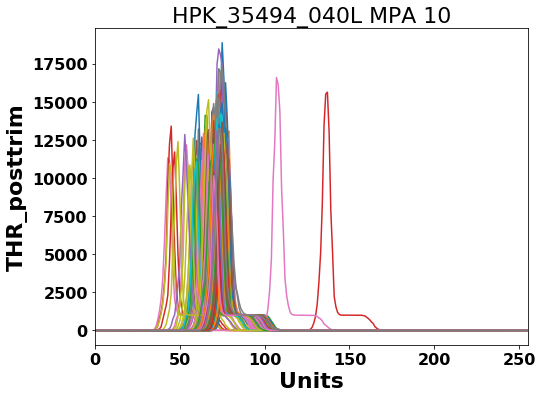

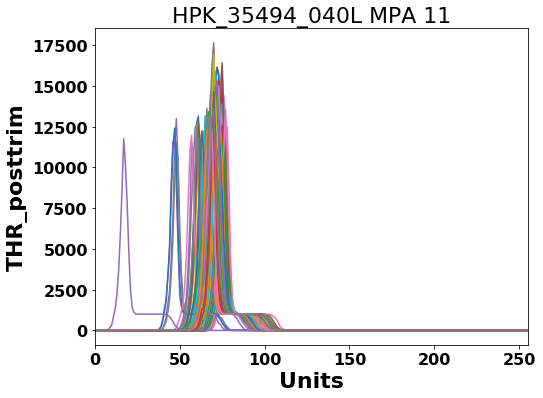

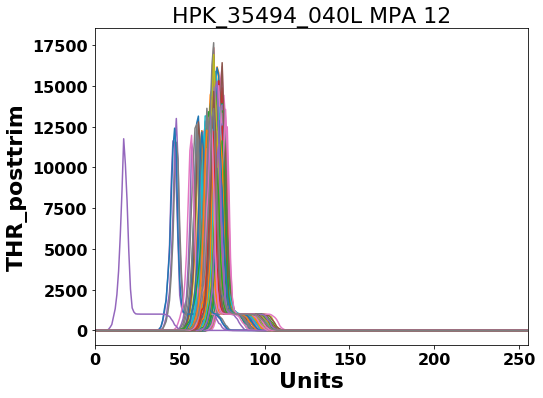

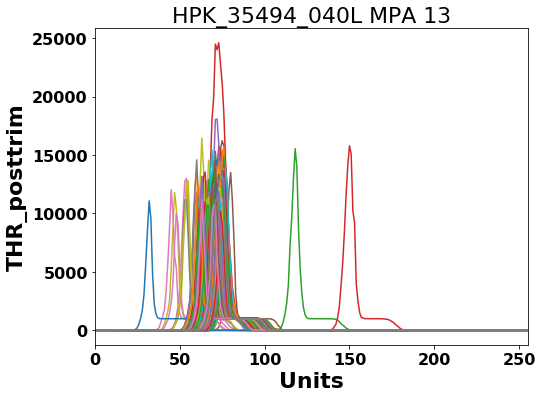

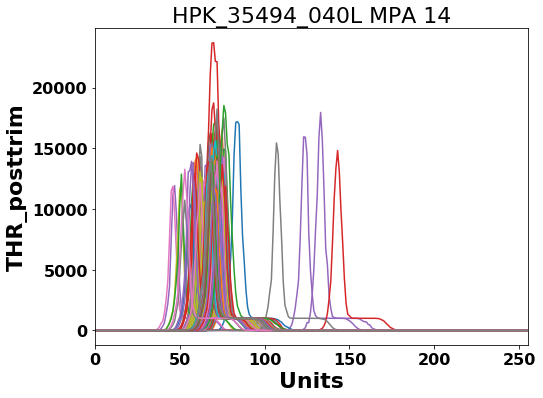

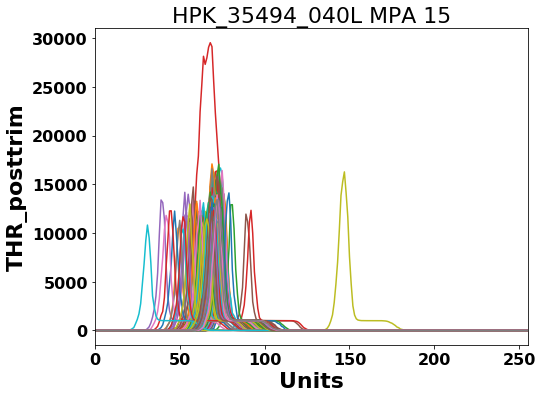

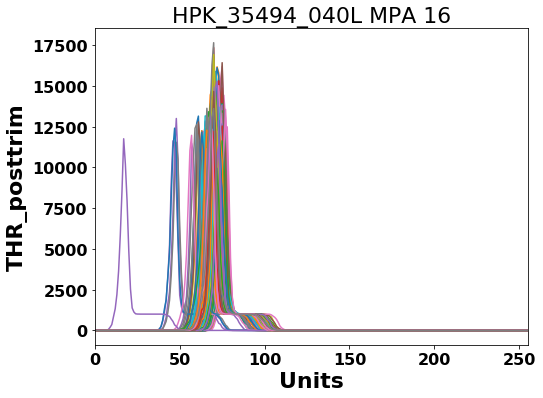

In [6]:
scurve_plots(mapsas,"THR_posttrim")

In [7]:
def scurve_plots_2dhist(mapsas, whichcurve):

    print("Processing " + str(len(mapsas)) + " MaPSAs for S-curve plots")

    # CAL pre-trim
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
                
            if whichcurve == "CAL_pretrim":
                df = chip.CALS_pretrim.transpose()[0:256]
            elif whichcurve == "CAL_posttrim":
                df = chip.CALS.transpose()[0:256]
            elif whichcurve == "THR_pretrim":
                df = chip.THRS_pretrim.transpose()[0:256]
            elif whichcurve == "THR_posttrim":
                df = chip.THRS.transpose()[0:256]
            elif whichcurve == "Bump":
                df = chip.BumpS.transpose()[0:256]
           
            plt.imshow(df,aspect='auto',origin='lower')
#            df.plot(legend=False,figsize=(8,6))
            plt.xlabel('Units',fontweight='bold')
            plt.ylabel(whichcurve,fontweight='bold')
            plt.title(m.name+" MPA " + str(chip.index))
            plt.tight_layout()
            
            plt.xlabel('Channel')
            plt.ylabel('THR DAC unit')
            #plt.clabel('Pulses')
            plt.savefig("scurves/"+m.name+"_"+str(chip.index)+"_"+whichcurve+"_Scurves.png",bbox_inches='tight')
            plt.savefig("scurves/"+m.name+"_"+str(chip.index)+"_"+whichcurve+"_Scurves.png",bbox_inches='tight')

            plt.colorbar()
            plt.clim(0,3000)
            #plt.ylim(50,150)
            plt.show()

In [ ]:
#scurve_plots_2dhist(mapsas,"THR_posttrim")

In [ ]:
scurve_plots(mapsas,"CAL_posttrim")

Processing 1 MaPSAs for S-curve plots


In [ ]:
#scurve_plots_2dhist(mapsas,"CAL_posttrim")